## Regressão linear

In [934]:
import numpy as np
import pandas as pd
import sklearn.feature_selection as fs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [935]:
def daterange(start_date, end_date):
    for i in range(int((end_date - start_date).days)):
         yield start_date + datetime.timedelta(i)

## Exemplo com Adamantina

In [936]:
dataframe = pd.read_csv('../normalizados/dados/3500105.csv')
dataframe

,Unnamed: 0,Município,Código IBGE,Populacao,Total 1ª Dose,Total 2ª Dose,Total Unica,Total Doses Aplicadas,População Vacinada dose1/População Total,População Vacinada/População Total,data,diagnostico_covid19,obito,media_movel_casos,media_movel_obitos,ocupacao_leitos,media_isolamento,Mean.R
0,0,ADAMANTINA,3500105.0,35111.0,0.000000,0.067900,0.0,0.000000,0.000000,0.062927,2021-02-21,0.25000,0.5,0.568966,0.444444,0.437308,0.462963,0.0
1,1,ADAMANTINA,3500105.0,35111.0,0.000559,0.068401,0.0,0.000540,0.000559,0.063391,2021-02-22,0.65625,0.5,0.620690,0.444444,0.452059,0.037037,0.0
2,2,ADAMANTINA,3500105.0,35111.0,0.001829,0.076029,0.0,0.003638,0.001829,0.070460,2021-02-23,0.31250,0.0,0.482759,0.444444,0.466810,0.111111,0.0
3,3,ADAMANTINA,3500105.0,35111.0,0.002134,0.076904,0.0,0.004106,0.002134,0.071271,2021-02-24,0.21875,0.5,0.431034,0.444444,0.437308,1.000000,0.0
4,4,ADAMANTINA,3500105.0,35111.0,0.002896,0.092410,0.0,0.009112,0.002896,0.085641,2021-02-25,0.12500,0.5,0.275862,0.555556,0.351875,0.092593,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,144,ADAMANTINA,3500105.0,35111.0,0.976066,0.988621,1.0,0.979759,0.976066,0.989454,2021-07-15,0.18750,0.0,0.198276,0.111111,0.110633,0.185185,0.0
145,145,ADAMANTINA,3500105.0,35111.0,0.990447,0.996374,1.0,0.992184,0.990447,0.996639,2021-07-16,0.09375,0.0,0.163793,0.111111,0.226490,0.074074,0.0
146,146,ADAMANTINA,3500105.0,35111.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,2021-07-17,0.00000,0.0,0.060345,0.000000,0.092502,0.259259,0.0
147,147,ADAMANTINA,3500105.0,35111.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,2021-07-18,0.06250,0.0,0.034483,0.000000,0.000000,0.611111,0.0


### *Seleção de atributos*

In [937]:
sel = fs.VarianceThreshold()
X = dataframe.drop(columns = ['Município', 'Código IBGE', 'data', 'diagnostico_covid19' ])
y = dataframe['diagnostico_covid19']

for i in range(9, 0, -1):
    sel = fs.SelectKBest(fs.mutual_info_regression, k=i)
    X_sel = sel.fit_transform(X, y)
    model = LinearRegression()
    scores_kfold = cross_val_score(estimator=model, X=X_sel, y=y, cv=9)
    score = scores_kfold.mean()
    print("Score com k = {} -> {}" .format(i, score))

Score com k = 9 -> 0.027652736561587572
Score com k = 8 -> 0.03210439701024695
Score com k = 7 -> 0.08262106609115534
Score com k = 6 -> 0.08284892860707721
Score com k = 5 -> 0.0918378103868368
Score com k = 4 -> 0.09183781038683655
Score com k = 3 -> 0.11304821255355502
Score com k = 2 -> 0.09608268226175673
Score com k = 1 -> 0.1110225835265747


In [938]:
#leitura
y_data = []
x_data = []

x_data = np.array(dataframe[['media_movel_casos', 'media_movel_obitos', 'ocupacao_leitos','media_isolamento', 'obito']])
y_data = np.array(dataframe['diagnostico_covid19'])

In [939]:
y_pred = []
y_true = []

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.7, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

for i in range(0, len(y_data)):
    y_pred.append(model.predict([x_data[i]]).reshape(1, -1)[0])
    
y_pred = np.array(y_pred)
y_true = np.array(y_true)

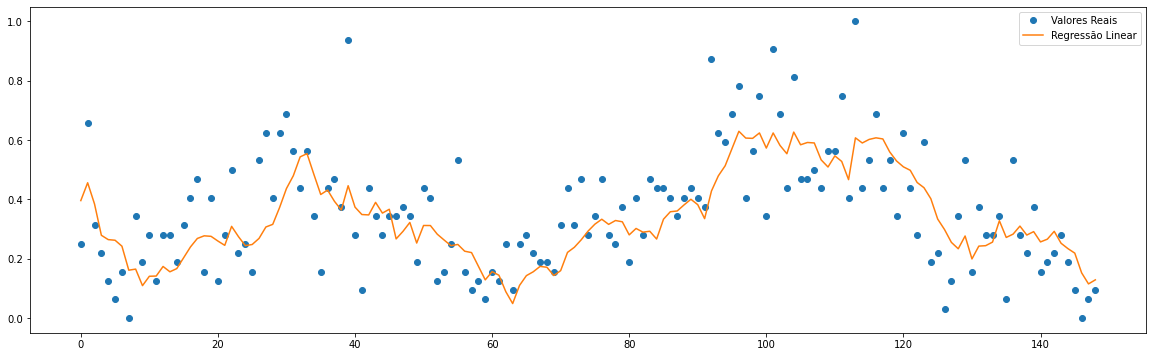

In [940]:
plt.figure(figsize=(20, 6))
plt.plot(y_data, 'o',label='Valores Reais')
plt.plot(y_pred, label='Regressão Linear')
#plt.plot(dataframe['media_movel_casos'], label='Regressão Linear')
plt.legend()
plt.show()

In [941]:
reg = LinearRegression()
scores = cross_val_score(reg, x_data, y_data, cv=7)
print(scores)
print(scores.mean()*100)

[0.37962055 0.23935338 0.03494069 0.02751099 0.28440839 0.30172219
 0.21016225]
21.110263386903657


### Colando dados dos últimos

In [942]:
def generate_time_lags(df, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n}"] = df_n["media_movel_casos"].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n
    
input_dim = 7

#dataframe = pd.read_csv('../normalizados/dados/3500204.csv')
df_generated = generate_time_lags(dataframe, input_dim)
df_generated

,Unnamed: 0,Município,Código IBGE,Populacao,Total 1ª Dose,Total 2ª Dose,Total Unica,Total Doses Aplicadas,População Vacinada dose1/População Total,População Vacinada/População Total,...,ocupacao_leitos,media_isolamento,Mean.R,lag1,lag2,lag3,lag4,lag5,lag6,lag7
7,7,ADAMANTINA,3500105.0,35111.0,0.002896,0.092535,0.0,0.009148,0.002896,0.085757,...,0.484327,0.777778,0.0,0.241379,0.241379,0.275862,0.431034,0.482759,0.620690,0.568966
8,8,ADAMANTINA,3500105.0,35111.0,0.007114,0.094410,0.0,0.012678,0.007114,0.087496,...,0.513829,0.074074,0.0,0.172414,0.241379,0.241379,0.275862,0.431034,0.482759,0.620690
9,9,ADAMANTINA,3500105.0,35111.0,0.023324,0.125422,0.0,0.033099,0.023324,0.116236,...,0.602028,0.222222,0.0,0.086207,0.172414,0.241379,0.241379,0.275862,0.431034,0.482759
10,10,ADAMANTINA,3500105.0,35111.0,0.042482,0.138927,0.0,0.050567,0.042482,0.128752,...,0.645974,0.203704,0.0,0.051724,0.086207,0.172414,0.241379,0.241379,0.275862,0.431034
11,11,ADAMANTINA,3500105.0,35111.0,0.042533,0.138927,0.0,0.050603,0.042533,0.128752,...,0.620774,0.203704,0.0,0.068966,0.051724,0.086207,0.172414,0.241379,0.241379,0.275862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,144,ADAMANTINA,3500105.0,35111.0,0.976066,0.988621,1.0,0.979759,0.976066,0.989454,...,0.110633,0.185185,0.0,0.224138,0.293103,0.250000,0.293103,0.327586,0.301724,0.344828
145,145,ADAMANTINA,3500105.0,35111.0,0.990447,0.996374,1.0,0.992184,0.990447,0.996639,...,0.226490,0.074074,0.0,0.198276,0.224138,0.293103,0.250000,0.293103,0.327586,0.301724
146,146,ADAMANTINA,3500105.0,35111.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,0.092502,0.259259,0.0,0.163793,0.198276,0.224138,0.293103,0.250000,0.293103,0.327586
147,147,ADAMANTINA,3500105.0,35111.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,0.000000,0.611111,0.0,0.060345,0.163793,0.198276,0.224138,0.293103,0.250000,0.293103


In [960]:
#leitura
y_data = []
x_data = []

x_data = df_generated.drop(columns = ['Unnamed: 0', 'Município', 'Código IBGE', 'diagnostico_covid19', 'data', 'População Vacinada/População Total', 'População Vacinada dose1/População Total', 'Total Doses Aplicadas', 'Total Unica'])
y_data = df_generated['diagnostico_covid19']
    
x_data = np.array(x_data)
y_data = np.array(y_data)

In [968]:
y_pred = []
y_true = []

tam = 30

X_train = x_data[ :-tam]
y_train = y_data[ :-tam]

x_test = x_data[len(x_data) - tam: len(x_data)]
y_test = y_data[len(x_data) - tam: len(x_data)]

print(X_train.shape)
print(x_test.shape)

reg = LinearRegression()
reg.fit(X_train, y_train)

for i in range(0, len(y_test)):
    y_pred.append(reg.predict([x_test[i]]).reshape(1, -1)[0])

    
y_pred = np.array(y_pred)
y_true = df_generated['diagnostico_covid19']
print(y_true.shape, y_pred.shape)

(112, 16)
(30, 16)
(142,) (30, 1)


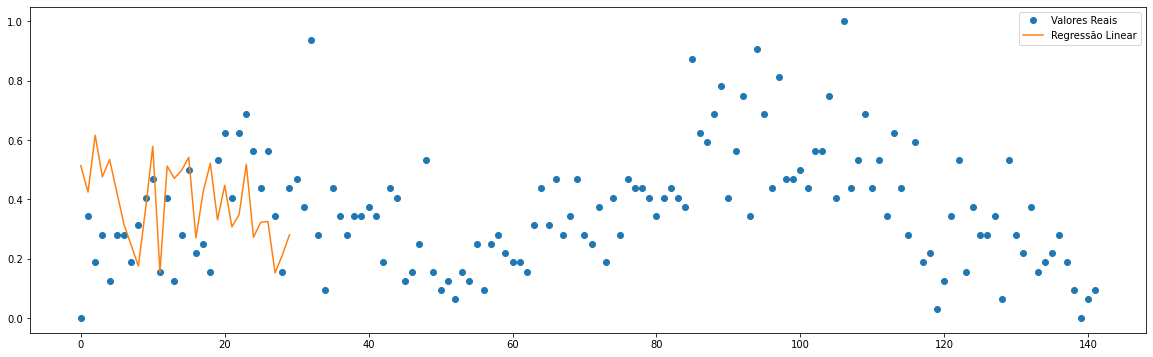

In [969]:
plt.figure(figsize=(20, 6))
plt.plot(y_data, 'o', label='Valores Reais')
plt.plot(y_pred, label='Regressão Linear')
plt.legend()
plt.show()

In [946]:
print(mean_squared_error(y_true, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [0, 137]

## Normalização utilizando standard

In [ ]:
dataframe = pd.read_csv('../Finais/3500105.csv')
dataframe

In [ ]:
scaler = StandardScaler()
norma = scaler.fit_transform(dataframe.drop(columns = ['Unnamed: 0', 'Município', 'Código IBGE', 'data']))
df_scaled = pd.DataFrame(norma, columns=dataframe.drop(columns = ['Unnamed: 0', 'Município', 'Código IBGE', 'data']).columns)
df_scaled[[ 'Município', 'Código IBGE', 'data']] = dataframe[[ 'Município', 'Código IBGE', 'data']]
df_scaled

In [ ]:
#leitura
y_data = []
x_data = []

#quantidade de dias para o deslocamento
dias = 0

for x in range(dias, dataframe.shape[0]):
    aux = dataframe.loc[x][['media_movel_casos', 'media_movel_obitos', 'ocupacao_leitos','media_isolamento', 'Mean.R', 'obito']]
    x_data.append(aux.values.tolist())
    y_data.append(dataframe.loc[x]['diagnostico_covid19'].tolist())
    
x_data = np.array(x_data)
y_data = np.array(y_data)

In [ ]:
y_pred = []
y_true = []

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.70, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

for i in range(0, len(y_data)):
    y_pred.append(model.predict([x_data[i]]).reshape(1, -1)[0])
    
y_pred = np.array(y_pred)
y_true = np.array(y_true)

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(y_data, 'o', label='Valores Reais')
plt.plot(y_pred, label='Regressão Linear')
plt.legend()
plt.show()

In [ ]:
reg = LinearRegression()
scores = cross_val_score(reg, x_data, y_data, cv=5)
print(scores)
print(scores.mean()*100)

In [ ]:
df_generated = generate_time_lags(df_scaled, input_dim)
df_generated

In [ ]:
#leitura
y_data = []
x_data = []

x_data = df_generated.drop(columns = ['Município', 'Mean.R','Código IBGE', 'diagnostico_covid19', 'data', 'População Vacinada/População Total', 'População Vacinada dose1/População Total', 'Total Doses Aplicadas', 'Total Unica'])
y_data = df_generated['diagnostico_covid19']
    
x_data = np.array(x_data)
y_data = np.array(y_data)

In [ ]:
y_pred = []
y_true = []

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.70, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

for i in range(0, len(y_data)):
    y_pred.append(model.predict([x_data[i]]).reshape(1, -1)[0])
    
y_pred = np.array(y_pred)
y_true = np.array(y_true)

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(y_data, 'o', label='Valores Reais')
plt.plot(y_pred, label='Regressão Linear')
plt.legend()
plt.show()

In [ ]:
reg = LinearRegression()
scores = cross_val_score(reg, x_data, y_data, cv=5)
print(scores)
print(scores.mean()*100)

### *Verificando modelo para óbitos*

In [ ]:
def generate_time_lags_obitos(df, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n}"] = df_n["media_movel_obitos"].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n

In [ ]:
dataframe = pd.read_csv('../normalizados/dados/3500105.csv')
dataframe.head(20)

In [ ]:
dataframe = pd.read_csv('../normalizados/dados/3500105.csv')
dataframe = generate_time_lags_obitos(dataframe, input_dim)
dataframe

In [ ]:
sel = fs.VarianceThreshold()
X = dataframe.drop(columns = ['Município', 'Código IBGE', 'data', 'obito', 'Unnamed: 0'])
y = dataframe['obito']

maior = 0
param = []
for i in range(9, 0, -1):
    sel = fs.SelectKBest(fs.mutual_info_regression, k=i)
    X_sel = sel.fit_transform(X, y)
    model = LinearRegression()
    scores_kfold = cross_val_score(estimator=model, X=X_sel, y=y, cv=9)
    score = scores_kfold.mean()
    if(score > maior):
        maior = score
        param = X_sel
        
    print("Score com k = {} -> {}" .format(i, score))

In [ ]:
print(param)

In [ ]:
y_data = []
x_data = []

x_data = dataframe[['media_movel_obitos', 'Total Doses Aplicadas']]
y_data = dataframe['obito']
    
x_data = np.array(x_data)
y_data = np.array(y_data)

In [ ]:
y_pred = []
y_true = []

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.50, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

for i in range(0, len(y_data)):
    y_pred.append(model.predict([x_data[i]]).reshape(1, -1)[0])
    
y_pred = np.array(y_pred)
y_true = np.array(y_true)

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(y_data, 'o', label='Valores Reais')
plt.plot(y_pred, label='Regressão Linear')
plt.legend()
plt.show()

In [ ]:
reg = LinearRegression()
scores = cross_val_score(reg, x_data, y_data, cv=5)
print(scores)
print(scores.mean()*100)

In [ ]:
y_data = []
x_data = []

x_data = dataframe[['media_movel_obitos', 'Total Doses Aplicadas', 'lag1', 'lag2', 'lag3']]
y_data = dataframe['obito']
    
x_data = np.array(x_data)
y_data = np.array(y_data)

y_pred = []
y_true = []

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.70, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

for i in range(0, len(y_data)):
    y_pred.append(model.predict([x_data[i]]).reshape(1, -1)[0])
    
y_pred = np.array(y_pred)
y_true = np.array(y_true)

plt.figure(figsize=(20, 6))
plt.plot(y_data, 'o', label='Valores Reais')
plt.plot(y_pred, label='Regressão Linear')
plt.legend()
plt.show()

reg = LinearRegression()
scores = cross_val_score(reg, x_data, y_data, cv=5)
print(scores)
print(scores.mean()*100)

In [ ]:
print(x_data[0])
print(y_data[0])

### *Verificando modelo para média móvel de óbitos*

In [ ]:
def generate_time_lags_obitos2(df, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n}"] = df_n["obito"].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n

In [ ]:
dataframe = pd.read_csv('../normalizados/dados/3500105.csv')
dataframe = generate_time_lags_obitos2(dataframe, input_dim)

sel = fs.VarianceThreshold()
X = dataframe.drop(columns = ['Município', 'Código IBGE', 'data', 'media_movel_obitos', 'Unnamed: 0'])
y = dataframe['media_movel_obitos']

maior = 0
param = []
for i in range(9, 0, -1):
    sel = fs.SelectKBest(fs.mutual_info_regression, k=i)
    X_sel = sel.fit_transform(X, y)
    model = LinearRegression()
    scores_kfold = cross_val_score(estimator=model, X=X_sel, y=y, cv=9)
    score = scores_kfold.mean()
    if(score > maior):
        maior = score
        param = X_sel
        
    print("Score com k = {} -> {}" .format(i, score))
    